In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:\project\Walmart_Linear_Regression-main\Dataset/Data_Cleaned.csv')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'CPI'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

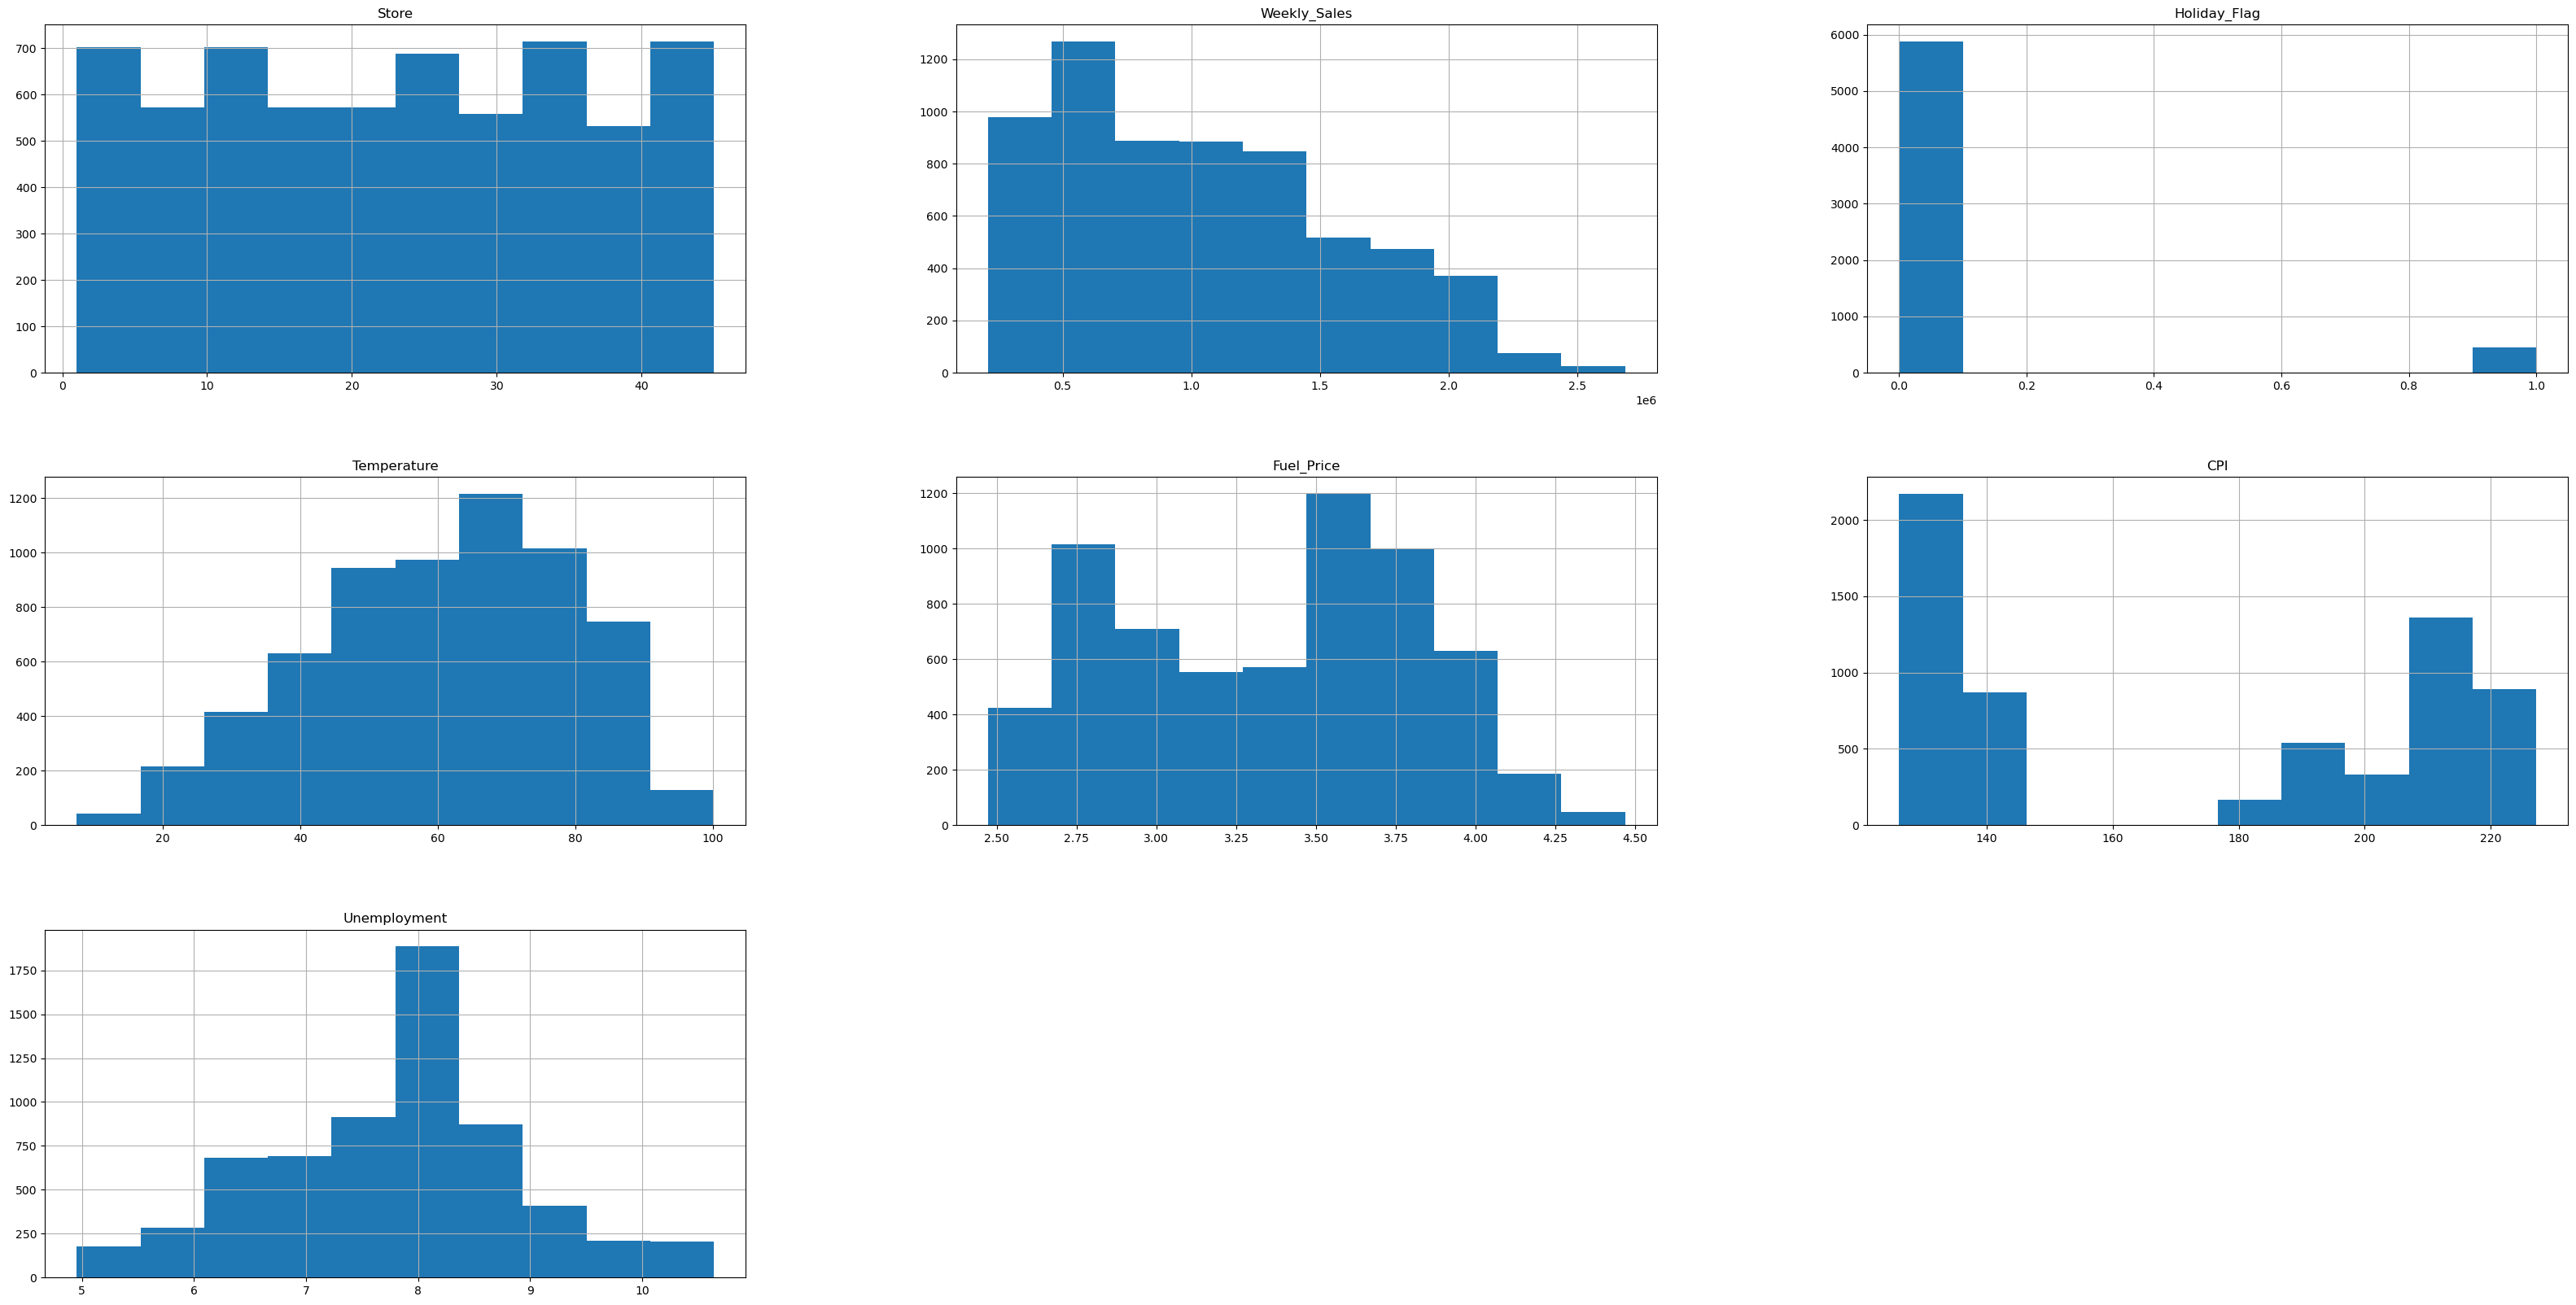

In [5]:
data.hist(figsize=(40,20))

In [9]:
data['Date']=pd.to_datetime(data['Date'])
data['Date'].head()

0   2010-05-02
1   2010-12-02
2   2010-02-19
3   2010-02-26
4   2010-05-03
Name: Date, dtype: datetime64[ns]

In [10]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

In [11]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [12]:
data['year'].value_counts()

2011    2286
2010    2160
2012    1883
Name: year, dtype: int64

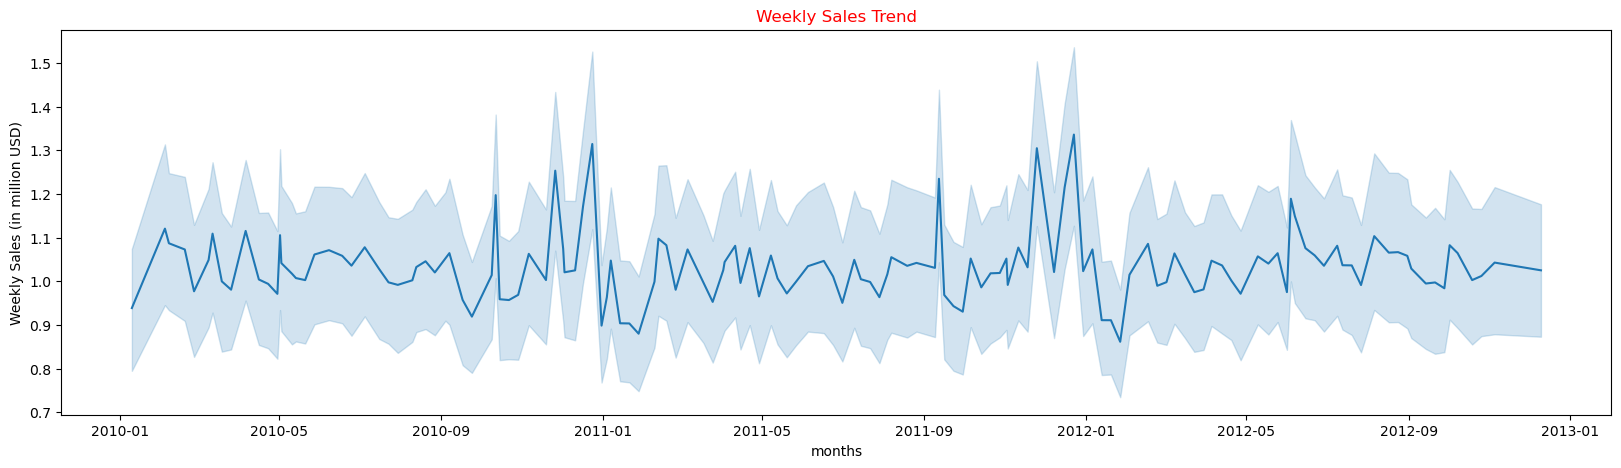

In [17]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=data.Date, y=(data.Weekly_Sales/1e6))
plt.xlabel('months')
plt.ylabel('Weekly Sales (in million USD)')
plt.title('Weekly Sales Trend',c='red')
# ,fontdict={'fontsize': 16, 'color':'red'}, pad=5)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

plt.show()

Inference : Sales grows in the month of :

November
December

In [18]:
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


In [19]:
holiday = data[data['Holiday_Flag']==1]
non_holiday = data[data['Holiday_Flag']!=1]

{'whiskers': [<matplotlib.lines.Line2D at 0x2dab38f7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2dab39065b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dab38f7d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2dab3906b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dab3906e20>],
 'means': []}

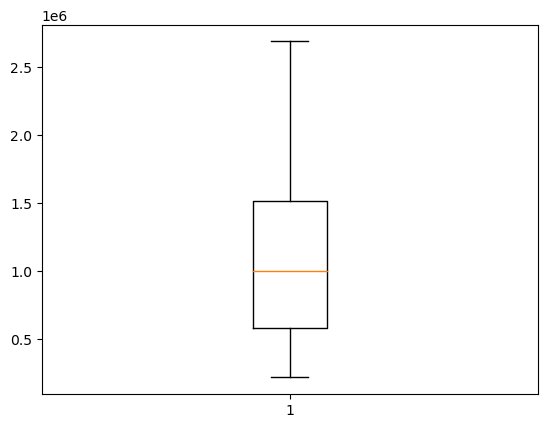

In [20]:
plt.boxplot(holiday['Weekly_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2dab39646d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2dab3964ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dab3964400>],
 'medians': [<matplotlib.lines.Line2D at 0x2dab3972280>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dab3972550>],
 'means': []}

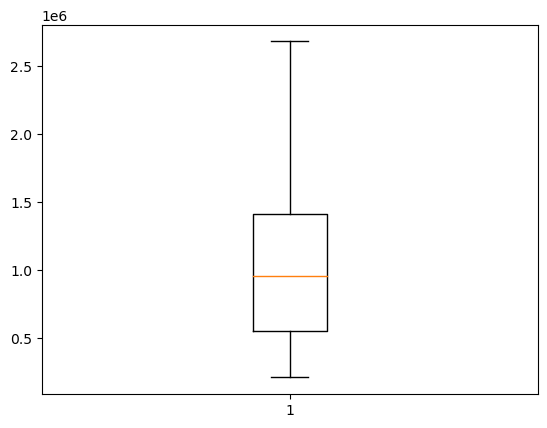

In [21]:
plt.boxplot(non_holiday['Weekly_Sales'])

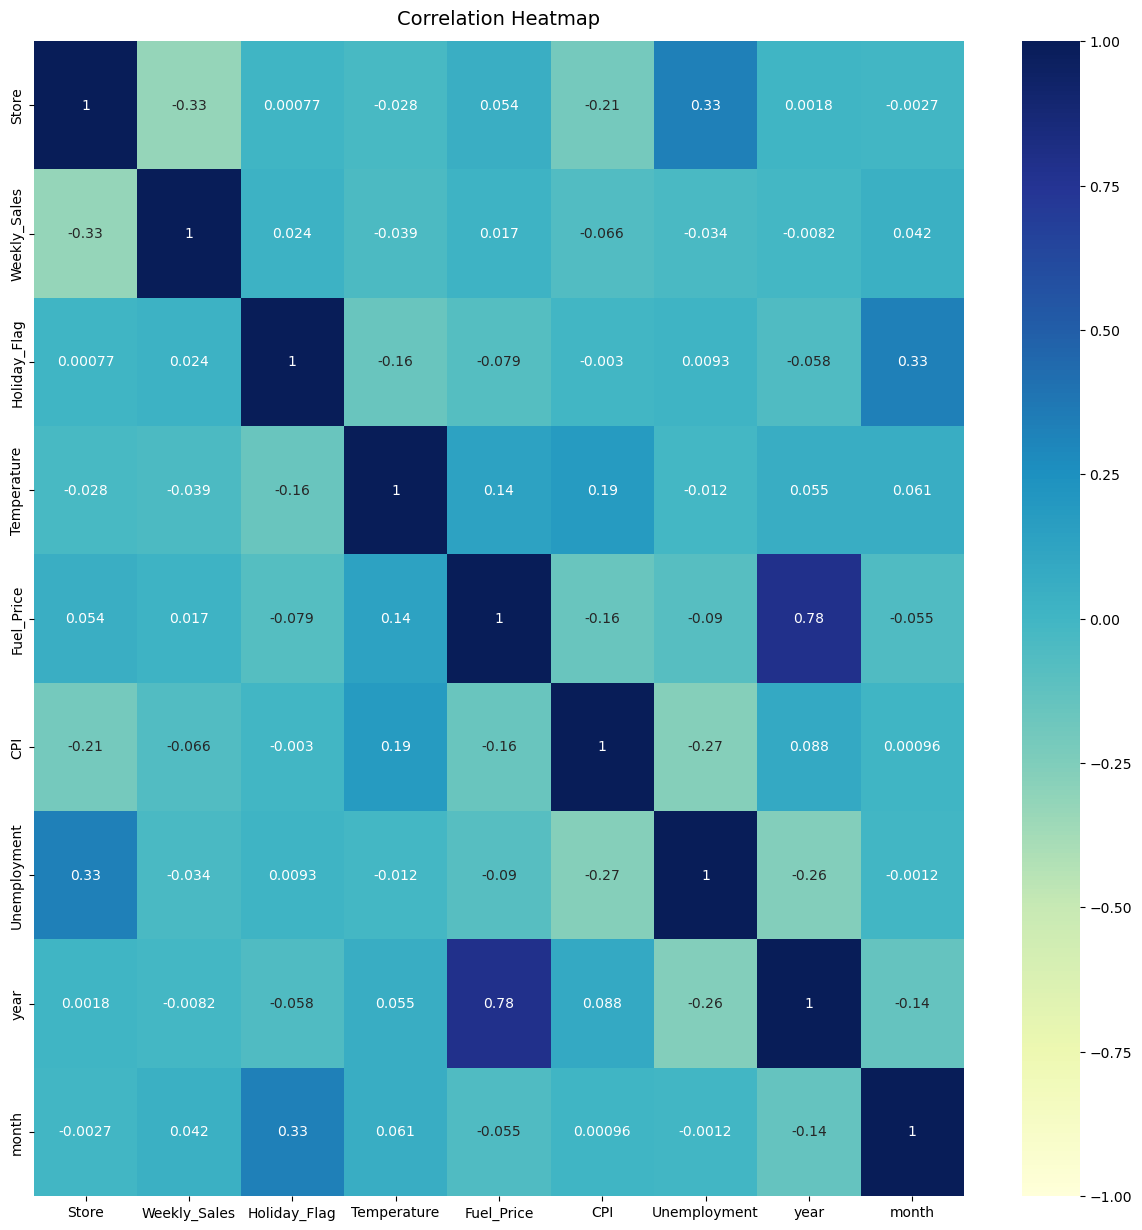

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);